# <font color = 'navy'>European Soccer Database Analysis
## Motivation: 
* <font color = 'navy'> **Gain valuable insight on which players to pick for a high scoring fantasy soccer team.** 
* <font color = 'navy'> **Assist with the coaches' decisions on field placement for athletes, especially strikers.**
* <font color = 'navy'> **Provide information that will help teams strategically build a game plan for upcoming matches.**

## Research Purpose: <br><br><font color='navy'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To determine if players who preferred using their right foot for shooting with a high shot power made more goals than right-footed players with a low shot power. This result is compared to left-footed players that scored with high and low shot power. 

#### Start by Importing Libraries
* Sqlite3
* Matplotlib
* Pandas
* Numpy
* Seaborn
* Scipy

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

#### Ingest Data into Notebook

In [2]:
# Create database connection
connect = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", connect)

#### Initial Column Search
For this stage, the subjects of the data we are working with is revealed. <br> These subjects allow us to formulate a research question regarding this soccer dataset. 

In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

#### Player_fifa_api_id, Preferred_foot, Shot_power, and Finishing is split from original DataFrame and added to a new DataFrame

In [4]:
shotdf = df[['player_fifa_api_id','preferred_foot','shot_power','finishing']]
print(shotdf.head(7))

   player_fifa_api_id preferred_foot  shot_power  finishing
0              218353          right        55.0       44.0
1              218353          right        55.0       44.0
2              218353          right        55.0       44.0
3              218353          right        54.0       43.0
4              218353          right        54.0       43.0
5              189615           left        71.0       53.0
6              189615           left        71.0       53.0


#### The DataFrame is shown to have 183,978 rows.
Once unique is used to find the averaged stats for each individual player, then this value will also show the number of players being analyzed.

In [5]:
shape = shotdf.shape
print(shape)
rows = shape[0]

(183978, 4)


# <font color = 'navy'> Data Cleaning: Check for Null Values

For any null values, the entire player's row of stats will be deleted to clean the dataset.

In [6]:
shotdf.isnull().any()

player_fifa_api_id    False
preferred_foot         True
shot_power             True
finishing              True
dtype: bool

#### Null values were found within the DataFrame. We need to determine how many rows contain null values.
Find out if it is even possible to delete null values by calculating the percent of the data after deleting rows.

In [7]:
nulls = shotdf.isnull().sum(axis=0)
print(nulls)
numNulls = nulls['preferred_foot']

player_fifa_api_id      0
preferred_foot        836
shot_power            836
finishing             836
dtype: int64


In [8]:
#Find Percent of data we'll have if we delete null rows
percent = ((rows-numNulls)/rows)*100
print("%.2f percent of the data remains after deleting null rows." % percent)

99.55 percent of the data remains after deleting null rows.


Since there is an adequate amount of data on players if we were to delete null data rows, **we can safely delete the null rows**.<br> **Next, check if nulls were deleted**

In [9]:
shotdf = shotdf.dropna()
shotdf.isnull().any()

player_fifa_api_id    False
preferred_foot        False
shot_power            False
finishing             False
dtype: bool

Null values were successfully deleted from the DataFrame.<br> Since preferred_foot is only left/right and id is a number corresponding to the player, we don't need more information to understand these columns. <br>However, for **Shot_power and finishing**, we don't know if the numbers are out of 100. **Max and min of these columns are found in the next step.**

In [10]:
maxShot = shotdf['shot_power'].max()
minShot = shotdf['shot_power'].min()
maxFinish = shotdf['finishing'].max()
minFinish = shotdf['finishing'].min()
print('Shot_power for each player is rank best at {}, and worst at {}.'.format(maxShot,minShot))
print('Finishing for each player is rank best at {}, and worst at {}.'.format(maxFinish,minFinish))

Shot_power for each player is rank best at 97.0, and worst at 2.0.
Finishing for each player is rank best at 97.0, and worst at 1.0.


As shown in [ 90 ], we can assume the ranking for worst to best in the shot_power and finishing columns is from 0 to 100 respectively. 

#### Find averaged data for each player
Since the player_fifa_api_id column shows that there are multiple stats on the same player, we must make the DataFrame unique and average the stats for each player. This is applied to the DataFrame below with the **groupby** and **unique** commands. The index is then reset to be each player's fifa id. 

In [11]:
shotdf.head()

,player_fifa_api_id,preferred_foot,shot_power,finishing
0,218353,right,55.0,44.0
1,218353,right,55.0,44.0
2,218353,right,55.0,44.0
3,218353,right,54.0,43.0
4,218353,right,54.0,43.0


In [12]:
uniqdf = shotdf.groupby(['player_fifa_api_id','preferred_foot'])['shot_power','finishing'].agg(lambda x: x.unique().mean())

In [13]:
#Make the player id the index for the DataFrame
uniqdf.reset_index(level="preferred_foot", inplace=True)

In [14]:
print(uniqdf.head())
uniqdf.loc[218353]

                   preferred_foot  shot_power  finishing
player_fifa_api_id                                      
2                            left      66.000  46.200000
6                           right      36.000  18.333333
11                          right      74.000  54.285714
16                          right      74.500  77.000000
27                          right      75.125  71.500000


preferred_foot    right
shot_power         54.5
finishing          43.5
Name: 218353, dtype: object

As seen above, the player shot_power and finishing are averaged. The preferred foot data is kept the same for each player as well. When checking player id number _218353_, we can see that the player is right-footed and has an averaged shot power of 54.5. The player has a finishing score of 43.5. Now, that the data has been pre-processed, we can now do the analysis and elegantly visualize our data to answer the research question. 

# <font color = 'navy'> Analyze the Data

Since the scoring for shot_power and finishing is out of 100, we can assume that anything from 50 to 100 is considered a high score and anything lower than 50 is a low score. **( Ex. Player _218353_ has a high shot power of 54.4, and a low finish of 43.5 )**

Split the data set to create two DataFrames. One for right-footed players and one for left-footed players.

In [20]:
rightdf = uniqdf.loc[uniqdf['preferred_foot'] == "right"]
leftdf = uniqdf.loc[uniqdf['preferred_foot'] == "left"]
print(rightdf.head(4))
print(leftdf.head(4))
print("There are {} right foot players and {} left foot players in the dataset.".format(rightdf.shape[0],leftdf.shape[0]))

                   preferred_foot  shot_power  finishing
player_fifa_api_id                                      
6                           right      36.000  18.333333
11                          right      74.000  54.285714
16                          right      74.500  77.000000
27                          right      75.125  71.500000
                   preferred_foot  shot_power  finishing
player_fifa_api_id                                      
2                            left       66.00  46.200000
28                           left       26.00  15.800000
80                           left       77.75  69.166667
158                          left       48.00  36.500000
There are 8979 right foot players and 3202 left foot players in the dataset.


**There are 5,777 more right foot players than left foot players.**

In [21]:
rightCorr = rightdf['shot_power'].corr(rightdf['finishing'])
leftCorr = leftdf['shot_power'].corr(leftdf['finishing'])
print("Right foot players have a correlation between their shot power and their finishing score of {:.2f}".format(rightCorr))
print("Left foot players have a correlation between their shot power and their finishing score of {:.2f}".format(leftCorr))

Right foot players have a correlation between their shot power and their finishing score of 0.78
Left foot players have a correlation between their shot power and their finishing score of 0.69


In [22]:
#Organize DataFrame by low vs. high shot power
RLowShot = rightdf[(rightdf['shot_power'] < 50)]
RHighShot = rightdf[(rightdf['shot_power'] >= 50)]
LLowShot = leftdf[(leftdf['shot_power'] < 50)]
LHighShot = leftdf[(leftdf['shot_power'] >= 50)]
#Take the Mean of the "finishing" column for the above 4 DataFrames
RLS = RLowShot['finishing'].mean()
RHS = RHighShot['finishing'].mean()
LLS = LLowShot['finishing'].mean()
LHS = LHighShot['finishing'].mean()
print('Right foot players with high shot power have {:.2f} percent chance to finish versus {:.2f} percent for low shot power.'.format(RHS,RLS))
print('Left foot players with high shot power have {:.2f} percent chance to finish versus {:.2f} percent for low shot power.'.format(LHS,LLS))

Right foot players with high shot power have 54.72 percent chance to finish versus 25.48 percent for low shot power.
Left foot players with high shot power have 52.45 percent chance to finish versus 28.85 percent for low shot power.


### <font color = 'blue'>For the results above in [ 213 ], we can see a pattern in the right foot players and the left foot players.
**It follows that a high shot power has a higher chance of finishing versus a low shot power, regardless of the players' preferred foot.**

# <font color = 'navy'>Data Visualization

In order to prepare for Seaborn plotting, set x and y values for right-footed players and left-footed players. Scipy's Stats function is used for finding the trendline equation. The limits, legend, title, and axis labels are then described following the plotting.

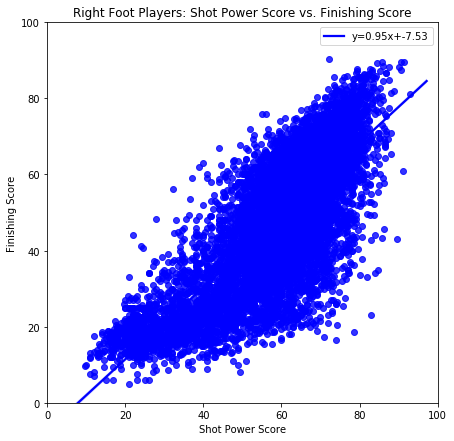

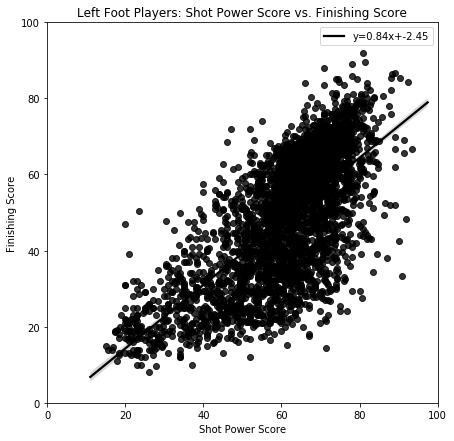

In [23]:
#x values will be shot power, and y values will be the finishing score. Both are out of 100. 
%matplotlib inline

#Plot Right Foot Players
plt.figure(figsize = (7,7))
slope, intercept, r_value, p_value, std_err = stats.linregress(rightdf['shot_power'],rightdf['finishing'])
ax1 = sns.regplot(x="shot_power", y="finishing", data=rightdf, color='b', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Right Foot Players: Shot Power Score vs. Finishing Score')
plt.xlabel('Shot Power Score')
plt.ylabel('Finishing Score')
ax1.legend(loc = 'best')
plt.show()

#Plot Left Foot Players
plt.figure(figsize = (7,7))
slope, intercept, r_value, p_value, std_err = stats.linregress(leftdf['shot_power'],leftdf['finishing'])
ax2 = sns.regplot(x="shot_power", y="finishing", data=leftdf, color='k', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Left Foot Players: Shot Power Score vs. Finishing Score')
plt.xlabel('Shot Power Score')
plt.ylabel('Finishing Score')
ax2.legend(loc = 'best')
plt.show()



The scatter plots shown above have a linear trendline fit to the data. Following the equation of a line y=mx+b, the slope (m) is greater on the Right Foot Players plot versus the Left Foot Players plot (0.95 vs. 0.84). This shows that given a high shot power score may result in a larger finishing score for right foot players rather than left foot players. Despite this, both graphs have a positive slope line, which means both parameters behave the same no matter the preferred foot. 

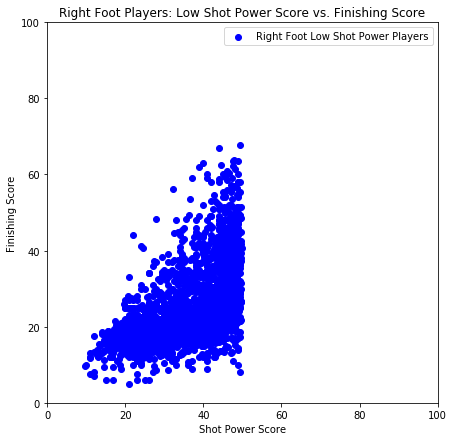

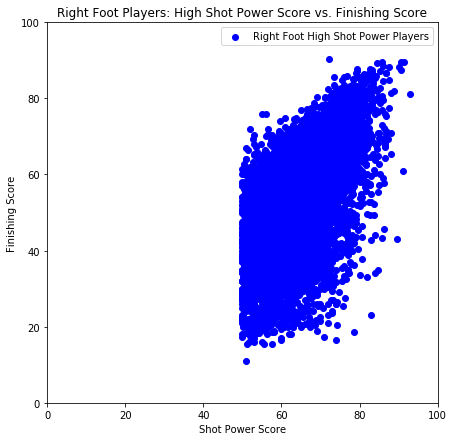

In [24]:
#Plot Right Foot Players with low shot power. This is to see if any with low shot power reach as high of a 
#finish score as those with high shot power. 

plt.figure(figsize = (7,7))
plt.scatter(x="shot_power", y="finishing", data=RLowShot, color='b',label='Right Foot Low Shot Power Players')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Right Foot Players: Low Shot Power Score vs. Finishing Score')
plt.xlabel('Shot Power Score')
plt.ylabel('Finishing Score')
plt.legend(loc = 'best')
plt.show()

#Now Plotting High shot power Right-footed players
plt.figure(figsize = (7,7))
plt.scatter(x="shot_power", y="finishing", data=RHighShot, color='b',label='Right Foot High Shot Power Players')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Right Foot Players: High Shot Power Score vs. Finishing Score')
plt.xlabel('Shot Power Score')
plt.ylabel('Finishing Score')
plt.legend(loc = 'best')
plt.show()

The plots above show that the players with the max finishing score with low shot power don't come close to the max finishing scores for players with a high shot power. <br> This can also be seen with left foot players below. 

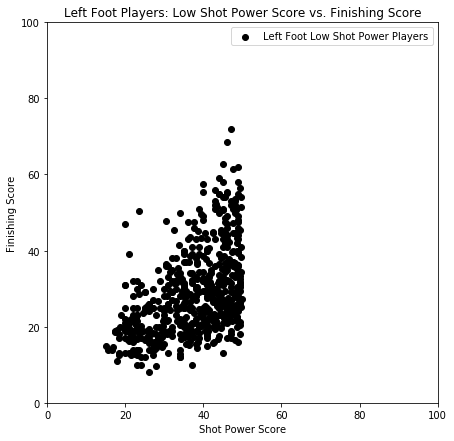

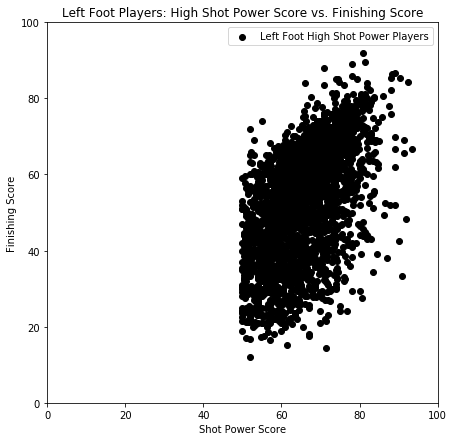

In [25]:
plt.figure(figsize = (7,7))
plt.scatter(x="shot_power", y="finishing", data=LLowShot, color='k',label='Left Foot Low Shot Power Players')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Left Foot Players: Low Shot Power Score vs. Finishing Score')
plt.xlabel('Shot Power Score')
plt.ylabel('Finishing Score')
plt.legend(loc = 'best')
plt.show()

#Now Plotting High shot power Right-footed players
plt.figure(figsize = (7,7))
plt.scatter(x="shot_power", y="finishing", data=LHighShot, color='k',label='Left Foot High Shot Power Players')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Left Foot Players: High Shot Power Score vs. Finishing Score')
plt.xlabel('Shot Power Score')
plt.ylabel('Finishing Score')
plt.legend(loc = 'best')
plt.show()

# <font color = 'navy'>Conclusion: Analysis of findings

* From the data analysis, it seems as though players with a high shot power score results in them receiving a greater finishing score. 
* Despite the mean values being greater for right-footed players, we can assume this is because there are more right foot players than left. There are 5777 more right foot players than left foot players in the dataset. 
* Since the trendline is positive for both right and left foot players' graphs, the shot power to finishing correlation is similar in both types of players.